 # Tutorial: ECT for CW complexes



 This tutorial walks you through how to build a CW complex with the `EmbeddedCW` class, and then use the `ECT` class to compute the Euler characteristic transform

In [1]:
from ect import ECT, EmbeddedCW
from ect.utils.examples import create_example_cw
import numpy as np


 The CW complex is the same as the `EmbeddedGraph` class with that additional ability to add faces. Faces are added by passing in a list of vertices. Note that we are generally assuming that these vertices follow around an empty region (as in, no other vertex is in the interior) in the graph bounded by the vertices, and further that all edges are already included in the graph. However the class does not yet check for this so you need to be careful!

<Axes: >

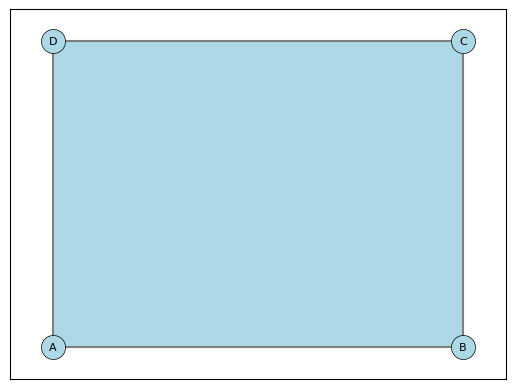

In [2]:
K = EmbeddedCW()

# Add vertices with coordinates
K.add_node("A", [0, 0])
K.add_node("B", [1, 0])
K.add_node("C", [1, 1])
K.add_node("D", [0, 1])

# Add edges to form a square
K.add_edges_from([("A", "B"), ("B", "C"), ("C", "D"), ("D", "A")])

# Add the square face
K.add_face(["A", "B", "C", "D"])

K.center_coordinates()
K.plot()


 Just to have something a bit more interesting, let's make a more complicated example that's built into the class.

<Axes: >

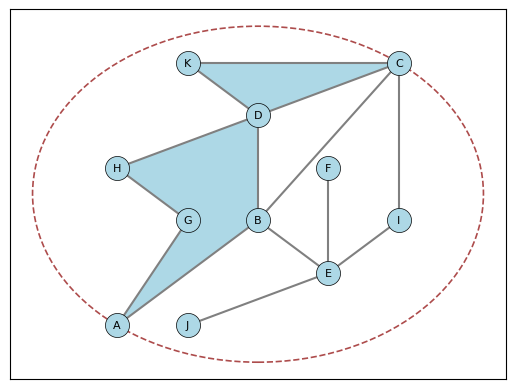

In [3]:
K = create_example_cw()
K.plot(bounding_circle=True)



 As with the `EmbeddedGraph` class, we can initialize the `ECT` class by deciding how many directions and how many thresholds to use.

In [4]:
ect = ECT(num_dirs=100, num_thresh=80)


 Then we can compute the ECC for a single direction. In this case, the $x$-axis will be computed for the `num_thresh=80` stopping points in the interval $[-1.2r,1.2r]$ where $r$ is the minimum bounding radius for the input complex.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<Axes: title={'center': 'ECC for $\\omega = [1. 0.]$'}, xlabel='$a$', ylabel='$\\chi(K_a)$'>

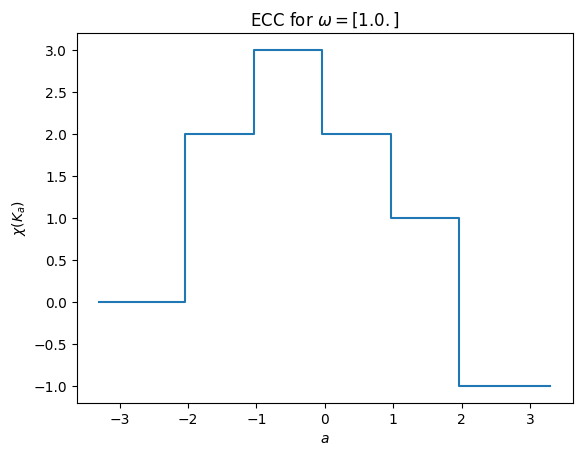

In [5]:
result = ect.calculate(K, theta=0)
result.plot()


 But of course it's easier to see this in a plot. This command calculates the ECC and immediately plots it.

In [6]:
# Set bounding radius to control threshold range
radius = K.get_bounding_radius()
ect.set_bounding_radius(1.2 * radius)


 Similarly, we can compute the ECT and return the matrix. We make sure to internally set the bounding radius to use to control the $y$ axis of the plot.

<Axes: xlabel='Direction $\\omega$ (radians)', ylabel='Threshold $a$'>

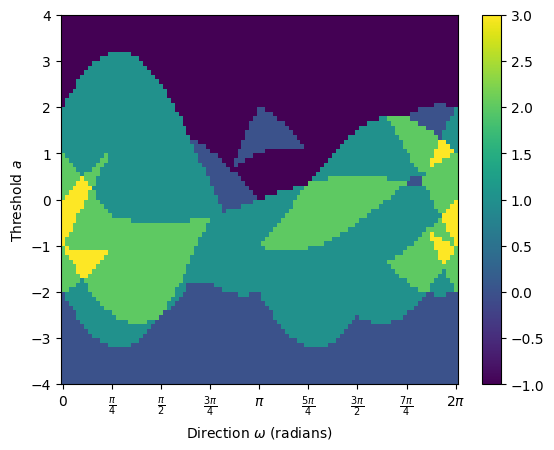

In [7]:
result = ect.calculate(K)
result.plot()


 We can also look at the Smooth ECT:

<Axes: xlabel='Direction $\\omega$ (radians)', ylabel='Threshold $a$'>

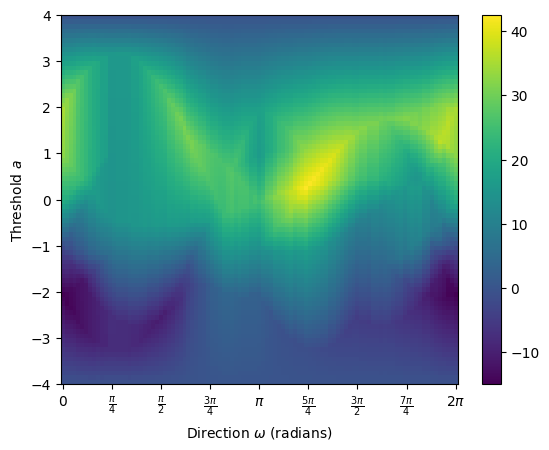

In [8]:
# Calculate SECT and plot
smooth = result.smooth()
smooth.plot()
